In [1]:
# Heart Disease Prediction using Data Mining Techniques

In [2]:
# This notebook downloads the dataset from Kaggle, performs cleaning, EDA, and builds three classification models.

In [3]:
# Install required libraries
!pip install opendatasets pandas numpy matplotlib seaborn scikit-learn

In [4]:
# Import libraries
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
import os
import opendatasets as od

# Point to the folder containing kaggle.json (current folder)
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()

# Kaggle dataset URL
dataset_url = 'https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset'


In [6]:
# Download dataset automatically
od.download(dataset_url)

Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset


100%|██████████| 6.18k/6.18k [00:00<00:00, 6.32MB/s]

In [7]:
# Load dataset (update path based on download)
dataset_path = './heart-disease-dataset/heart.csv'
df = pd.read_csv(dataset_path)

In [8]:
# Quick overview of data
print(df.head())
print(df.info())
print(df.describe())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

In [9]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [10]:
# Encode categorical variables if needed
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [11]:
# Outlier handling using IQR method
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

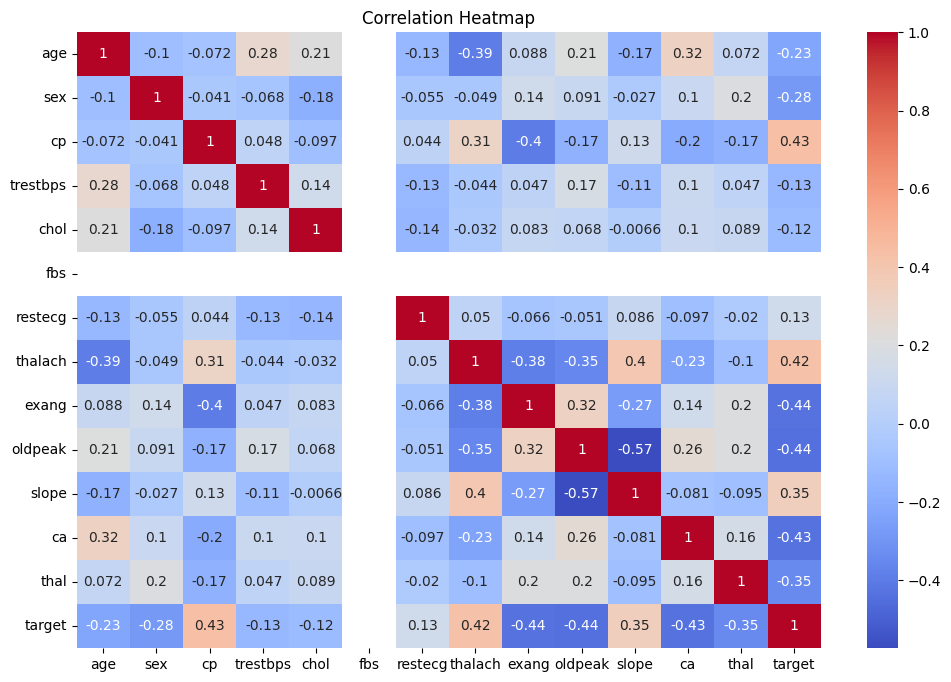

In [12]:
# Exploratory Data Analysis
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

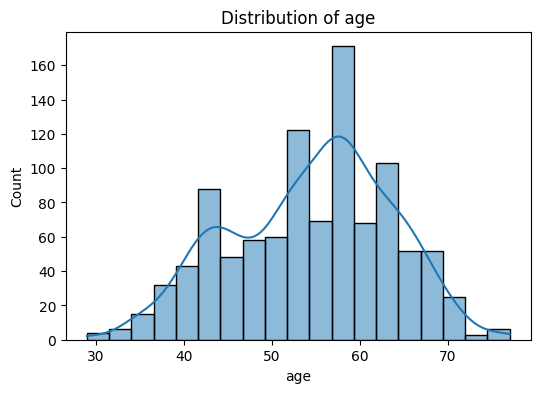

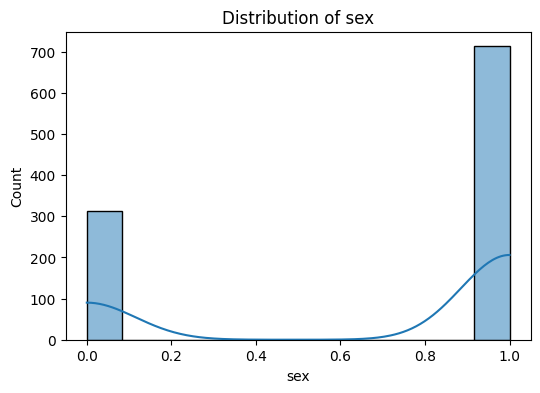

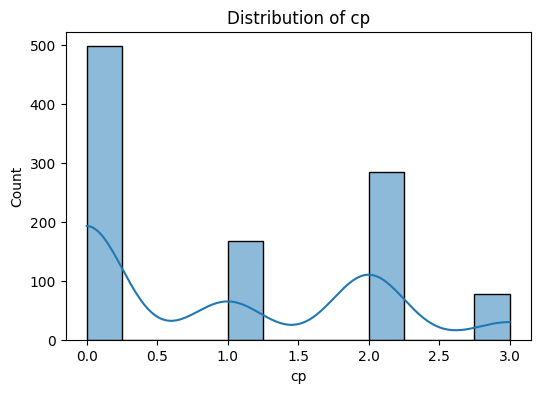

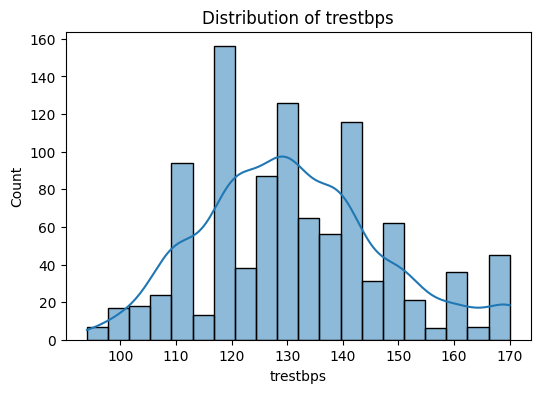

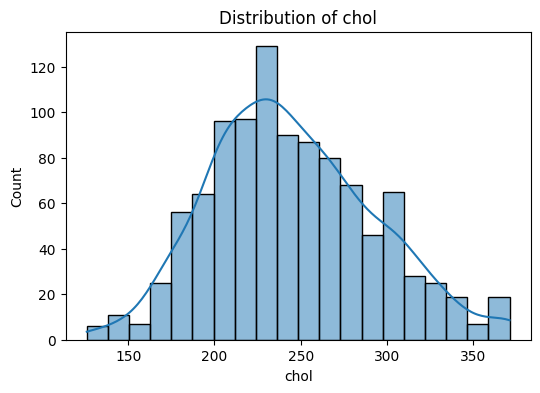

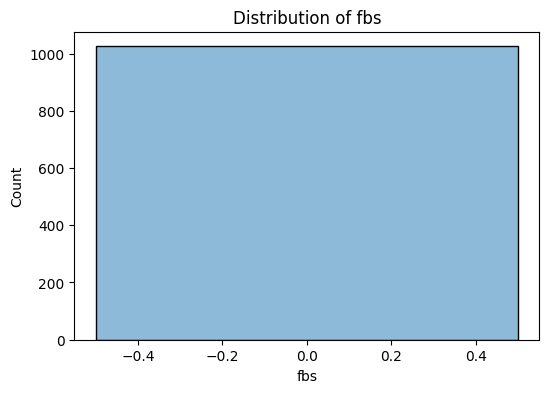

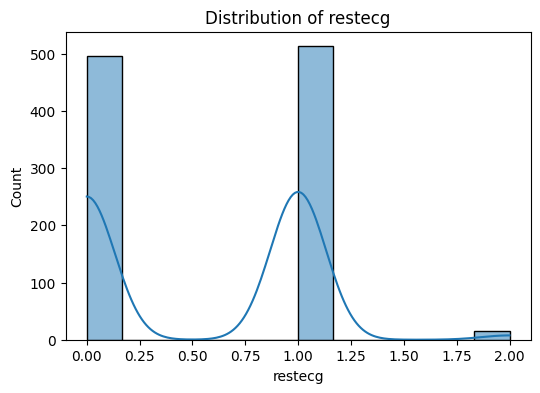

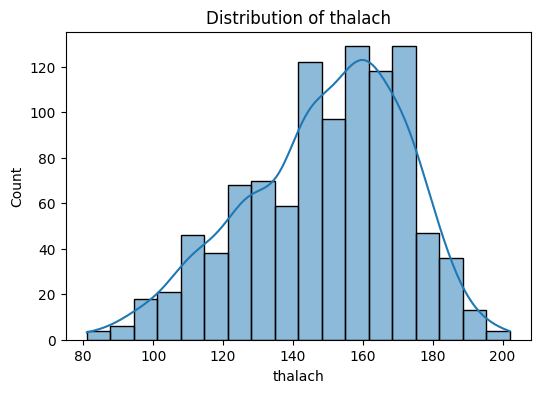

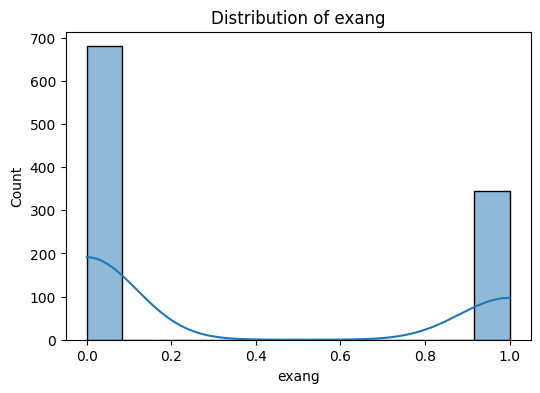

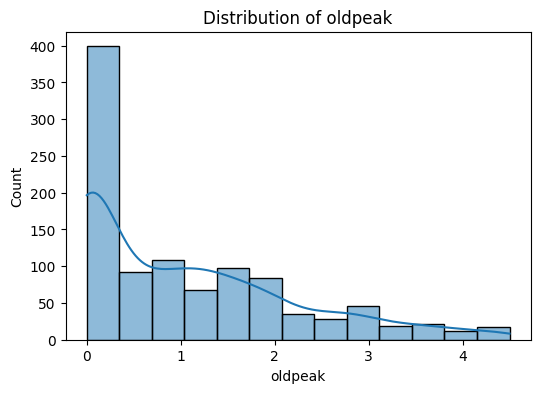

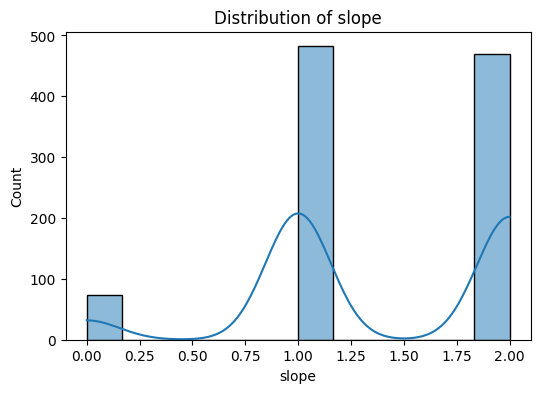

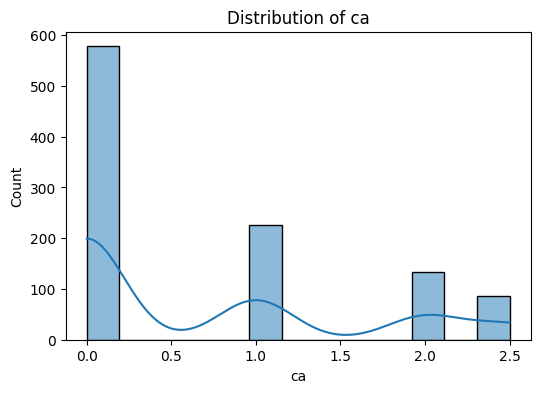

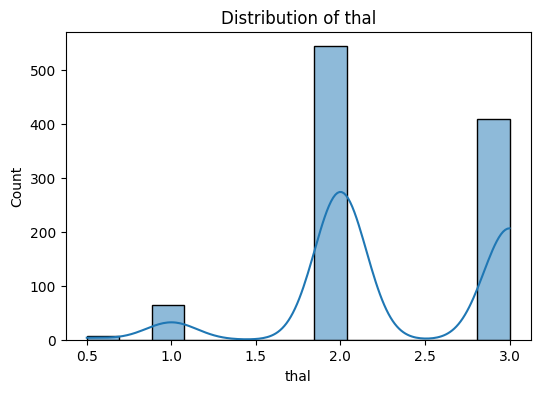

In [13]:
# Additional EDA plots
for col in df.columns[:-1]:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

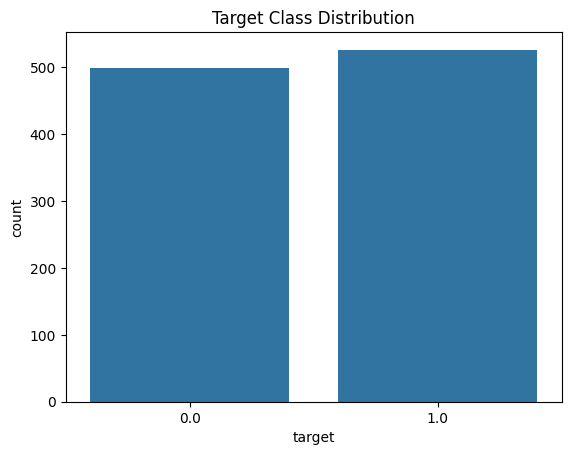

In [14]:
# Target distribution
sns.countplot(x='target', data=df)
plt.title('Target Class Distribution')
plt.show()

In [15]:
# Split features and target
y = df['target']
X = df.drop('target', axis=1)

In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

In [19]:
# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-score': report['weighted avg']['f1-score']
    })
    print(f'--- {name} ---')
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('\n')

--- Logistic Regression ---
Confusion Matrix:
 [[71 31]
 [13 90]]


--- Decision Tree ---
Confusion Matrix:
 [[102   0]
 [  3 100]]


--- Random Forest ---
Confusion Matrix:
 [[102   0]
 [  3 100]]




In [20]:
# Comparison table of all models
results_df = pd.DataFrame(results)
print('Model Comparison:')
print(results_df)

Model Comparison:
                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.785366   0.794272  0.785366  0.783604
1        Decision Tree  0.985366   0.985784  0.985366  0.985364
2        Random Forest  0.985366   0.985784  0.985366  0.985364


In [21]:
# Identify best-performing model
best_model = results_df.loc[results_df['F1-score'].idxmax()]
print(f"\nBest Performing Model: {best_model['Model']} with F1-score = {best_model['F1-score']:.2f}")



Best Performing Model: Decision Tree with F1-score = 0.99
